In [1]:
import pandas as pd
import importlib
import numpy as np
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
import custom_utils
import custom_logging
importlib.reload(custom_utils)
importlib.reload(custom_logging)
import scipy.stats as stats

In [2]:
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)
datautil = custom_utils.DataPrepUtil()

In [3]:
X.head()
X.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)

LinearRegression()

In [8]:
# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

Train set
Linear Regression mse: 0.6272722398934215
Test set
Linear Regression mse: 0.5807208892652195


In [9]:
error = y_test - pred

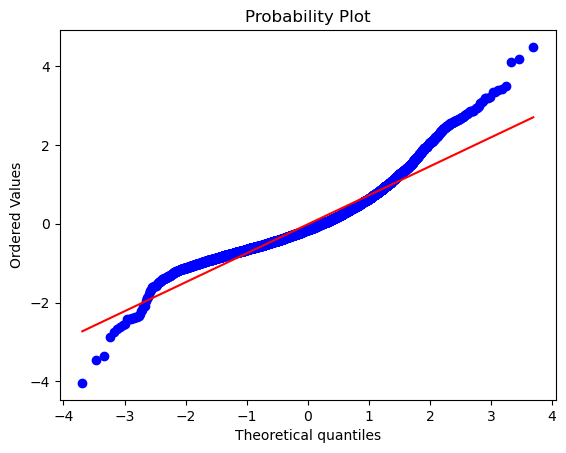

In [10]:
stats.probplot(error, dist='norm', plot=plt)
plt.show()

2024-02-25 19:17:57 - INFO - plot_residual_distribution - subplots=1; in (1,1) format. And axes shape=1
2024-02-25 19:17:57 - INFO - plot_residual_distribution - Axes to be plotted is: 0,0.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


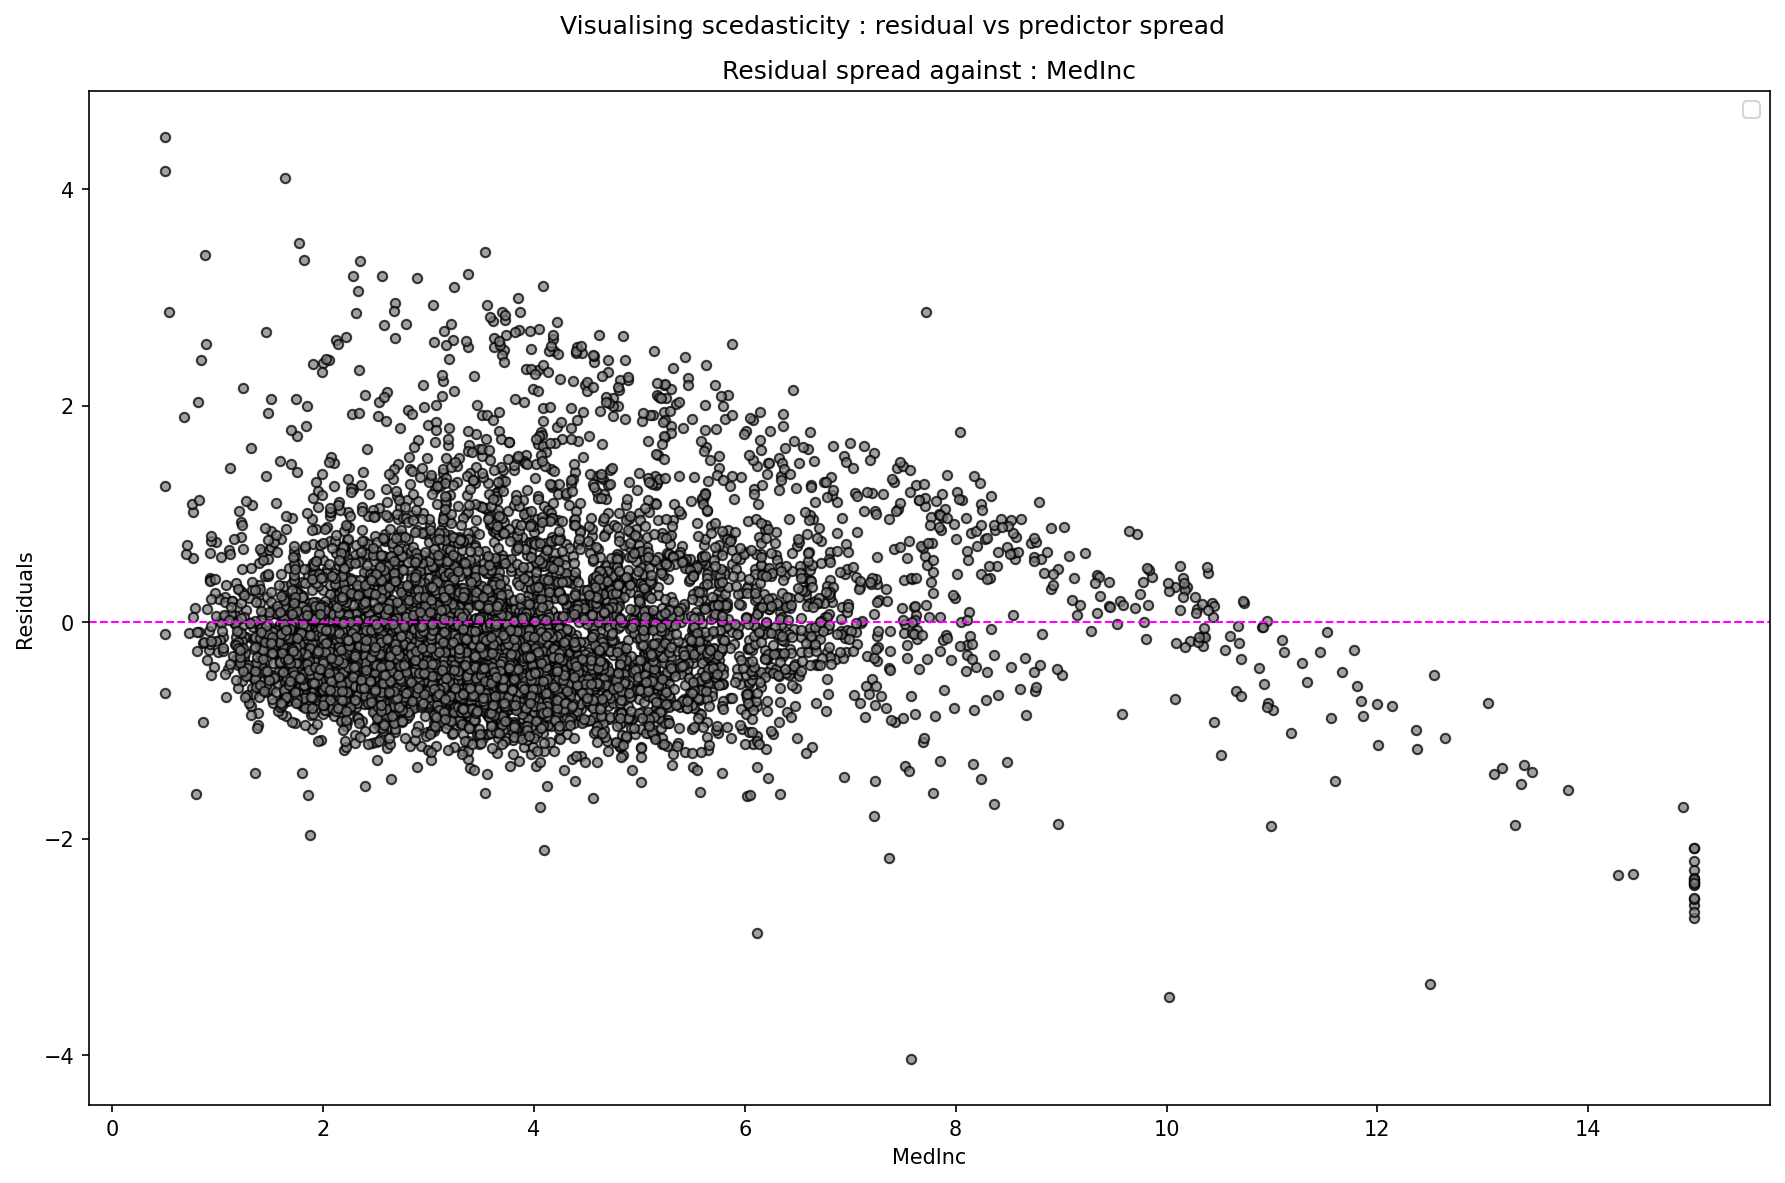

In [19]:
column_subset = ['MedInc']
datautil.plot_residual_distribution(column_subset, error, X_test[column_subset])


2024-02-25 19:17:57 - INFO - plot_residual_distribution - subplots=3; in (2,2) format. And axes shape=(2, 2)
2024-02-25 19:17:57 - INFO - plot_residual_distribution - Axes to be plotted is: 0,0.
2024-02-25 19:17:57 - INFO - plot_residual_distribution - Axes to be plotted is: 0,1.
2024-02-25 19:17:57 - INFO - plot_residual_distribution - Axes to be plotted is: 1,0.
2024-02-25 19:17:57 - INFO - plot_residual_distribution - Axes to be suppressed is: 1,1.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


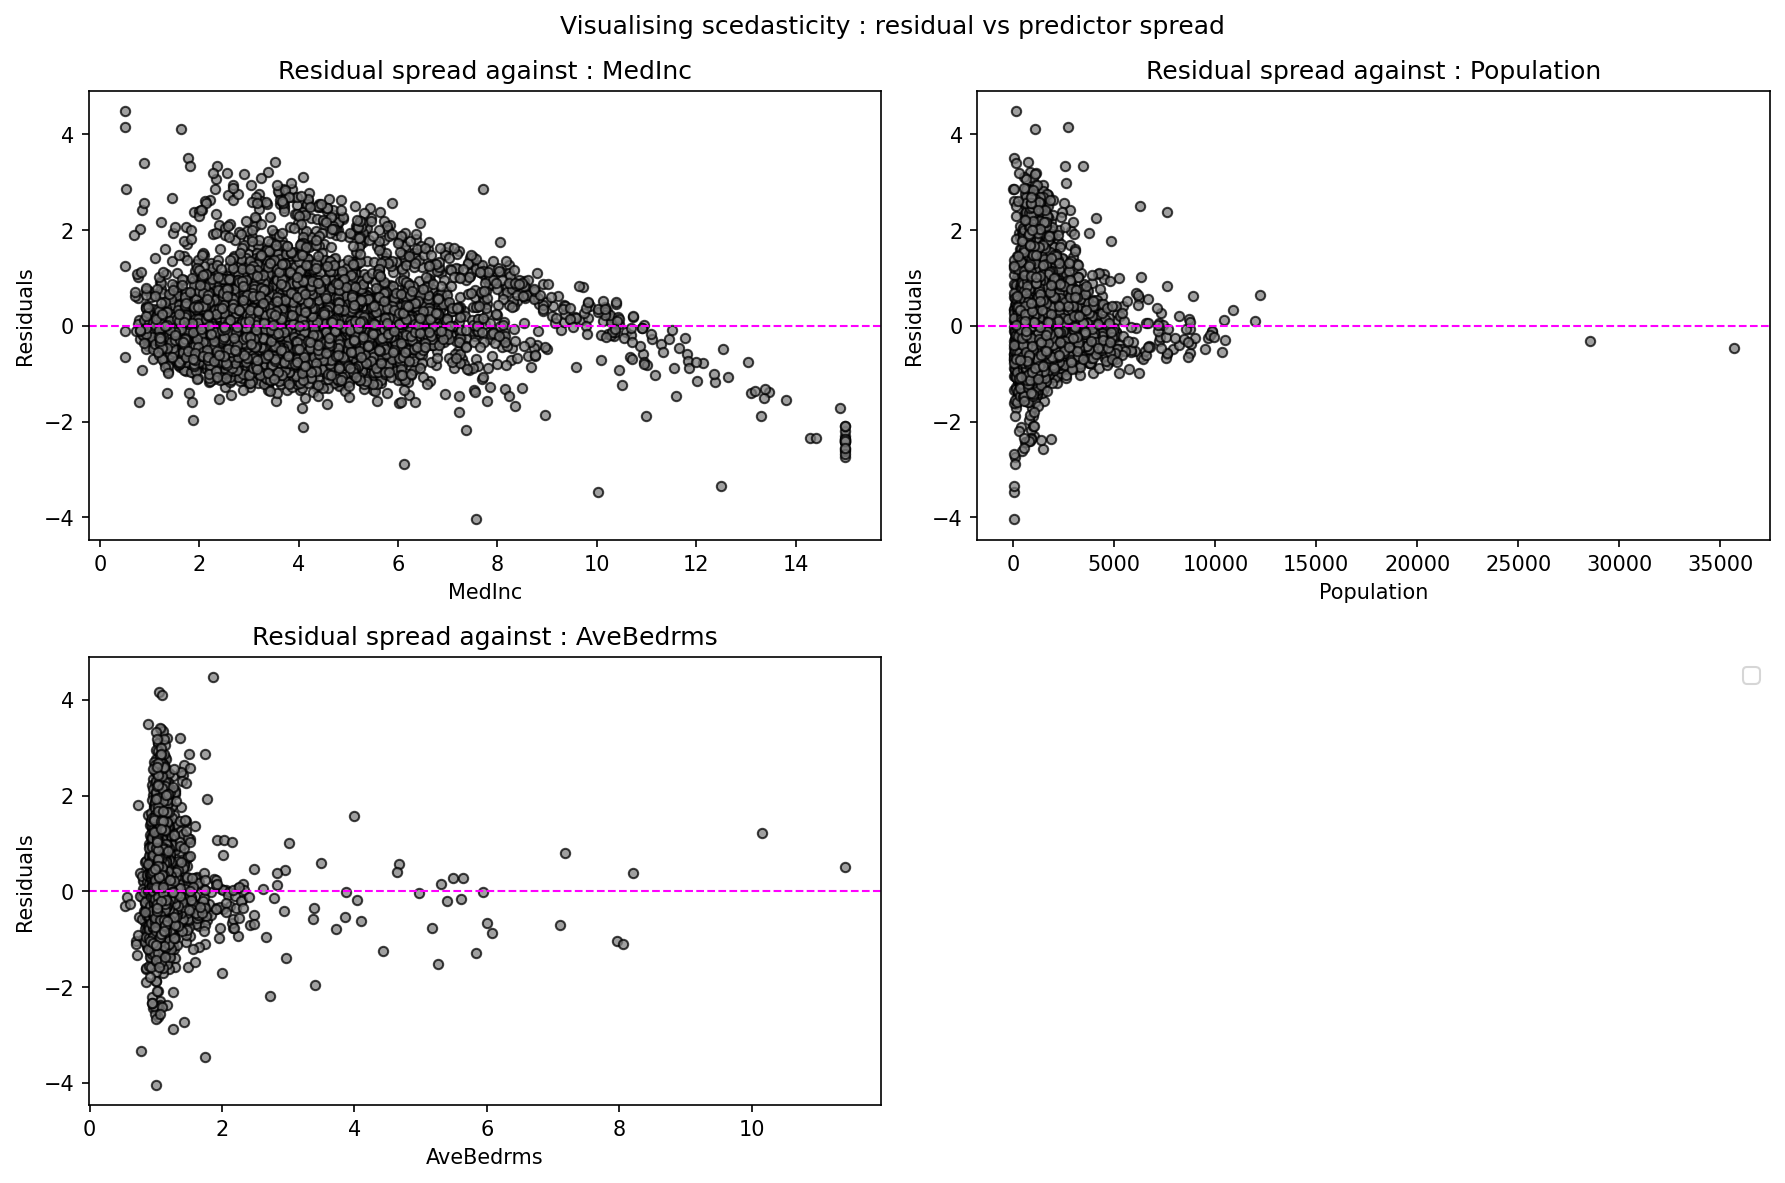

In [20]:
column_subset = ['MedInc', 'Population', 'AveBedrms']
datautil.plot_residual_distribution(column_subset, error, X_test[column_subset])


2024-02-25 20:55:11 - INFO - plot_variable_distribution - subplots=3; in (2,2) format. Axes shape is (2, 2).
2024-02-25 20:55:11 - INFO - plot_variable_distribution - Axes to be plotted is: 0,0.
2024-02-25 20:55:11 - INFO - plot_variable_distribution - Axes to be plotted is: 0,1.
2024-02-25 20:55:11 - INFO - plot_variable_distribution - Axes to be plotted is: 1,0.
2024-02-25 20:55:11 - INFO - plot_variable_distribution - Axes to be suppressed is: 1,1.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


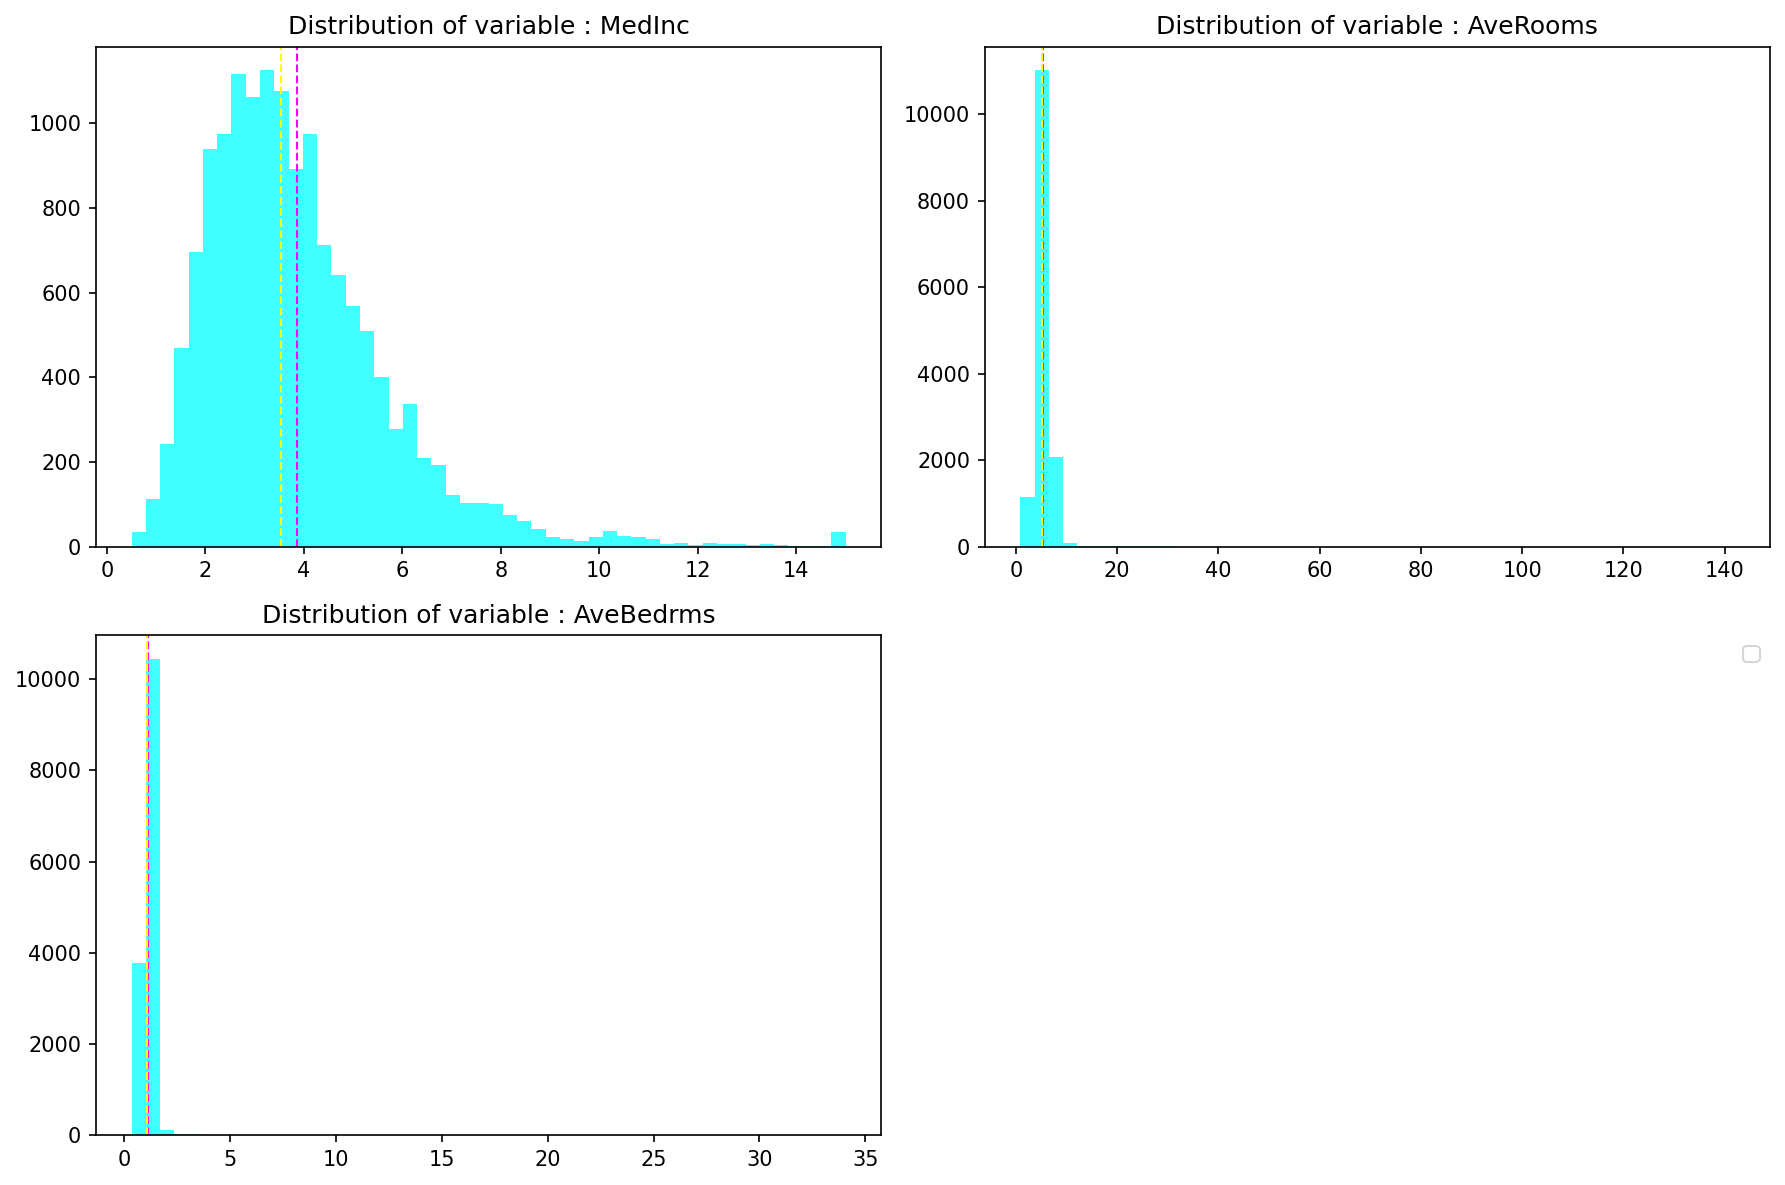

In [11]:
# column_subset = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
column_subset = ['MedInc', 'AveRooms', 'AveBedrms']
datautil.plot_variable_distribution(column_subset, X_train[column_subset])

2024-02-25 20:55:12 - INFO - plot_variable_distribution - subplots=3; in (2,2) format. Axes shape is (2, 2).
2024-02-25 20:55:12 - INFO - plot_variable_distribution - Axes to be plotted is: 0,0.
2024-02-25 20:55:12 - INFO - plot_variable_distribution - Axes to be plotted is: 0,1.
2024-02-25 20:55:12 - INFO - plot_variable_distribution - Axes to be plotted is: 1,0.
2024-02-25 20:55:12 - INFO - plot_variable_distribution - Axes to be suppressed is: 1,1.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


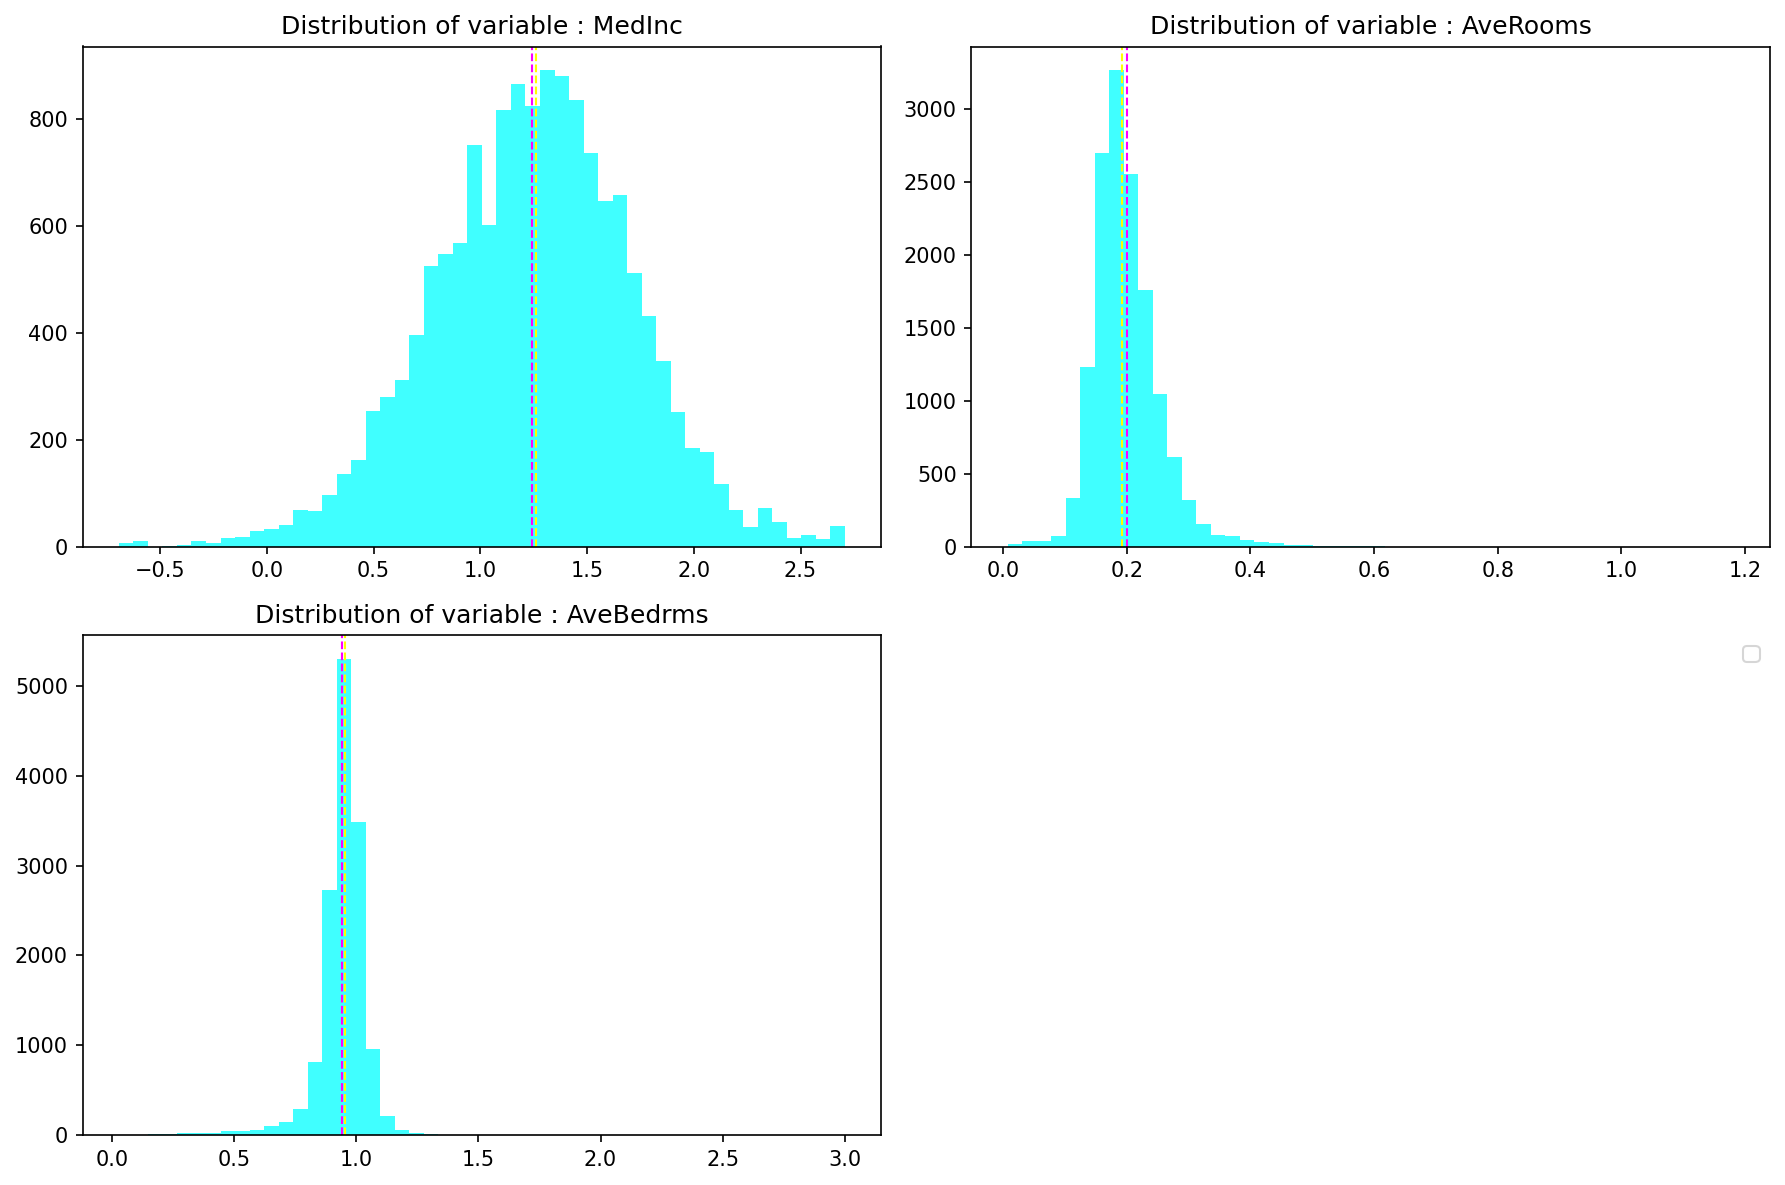

In [12]:
# column_subset = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
column_subset = ['MedInc', 'AveRooms', 'AveBedrms']
X_train_scale = X_train
X_train_scale['MedInc'] = np.log(X_train['MedInc'])
X_train_scale['AveRooms'] = 1 / X_train['AveRooms']
X_train_scale['AveBedrms'] = 1 / X_train['AveBedrms']
datautil.plot_variable_distribution(column_subset, X_train_scale[column_subset])

In [13]:
ti_col_set = ['pclass', 'age', 'fare', 'survived']
ti_predictor_col_set = ['pclass', 'age', 'fare']
df_ti = pd.read_csv('../Datasets/titanic.csv', usecols=ti_col_set)

X_ti_train, X_ti_test, y_ti_train, y_ti_test = train_test_split(df_ti[ti_predictor_col_set].fillna(0), df_ti.survived, test_size=0.3, random_state=0)

In [14]:
X_ti_train.shape, X_ti_test.shape

((916, 3), (393, 3))

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_ti_train)
X_ti_train_scaled = scaler.transform(X_ti_train)
X_ti_test_scaled = scaler.transform(X_ti_test)

In [16]:
model_logit = LogisticRegression(random_state=43, C=1000, solver='lbfgs')
model_logit.fit(X_ti_train, y_ti_train)
pred_train=model_logit.predict_proba(X_ti_train)
pred_test=model_logit.predict_proba(X_ti_test)
print('Train set roc-auc: {}'.format(roc_auc_score(y_ti_train, pred_train[:, 1])))
print('Test set roc-auc: {}'.format(roc_auc_score(y_ti_test, pred_test[:, 1])))

Train set roc-auc: 0.6793181006244372
Test set roc-auc: 0.7175488081411426


In [17]:
model_logit.coef_

array([[-0.71428242, -0.00923013,  0.00425235]])

In [18]:
model_logit = LogisticRegression(random_state=43, C=1000, solver='lbfgs')
model_logit.fit(X_ti_train_scaled, y_ti_train)
pred_train=model_logit.predict_proba(X_ti_train_scaled)
pred_test=model_logit.predict_proba(X_ti_test_scaled)
print('Train set roc-auc: {}'.format(roc_auc_score(y_ti_train, pred_train[:, 1])))
print('Test set roc-auc: {}'.format(roc_auc_score(y_ti_test, pred_test[:, 1])))

Train set roc-auc: 0.6793281640744896
Test set roc-auc: 0.7175488081411426


In [16]:
model_logit.coef_

array([[-1.42875872, -0.68293349,  2.17646757]])

In [9]:
new_cols = [f'{var}_mi' for var in X_train.columns]
new_cols

NameError: name 'X_train' is not defined

In [61]:
vars_to_impute = [var for var in X_train.columns if X_train[var].isna().sum() > 0]
vars_to_impute

['MedInc']

In [62]:
imputation_dict = X_train[vars_to_impute].median().to_dict()
imputation_dict

{'MedInc': -1.0417308130832197}

In [19]:
column_groups = datautil.col_groups_by_datatypes(X_ti_train)

2024-02-25 20:55:21 - INFO - col_groups_by_datatypes - START ...
2024-02-25 20:55:21 - INFO - col_groups_by_datatypes - ... FINISH


In [20]:
X_ti_train.isna().sum()

pclass    0
age       0
fare      0
dtype: int64

In [22]:
datautil.add_missing_indicators(X_ti_train)

2024-02-25 20:55:58 - INFO - add_missing_indicators - START ...
2024-02-25 20:55:58 - INFO - add_missing_indicators - ... FINISH


pclass          0
age             0
fare            0
pclass_na       0
age_na          0
fare_na         0
pclass_na_na    0
age_na_na       0
fare_na_na      0
dtype: int64